In [31]:
import os
import numpy as np
import librosa
import pandas as pd
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import ast
import re

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [32]:
data = '/Users/korakoppanaveen/Documents/Study/MSc Project/EmotionBasedMusicRecommendationSystem/audio_features.csv'
df = pd.read_csv(data)

/Users/korakoppanaveen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/korakoppanaveen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


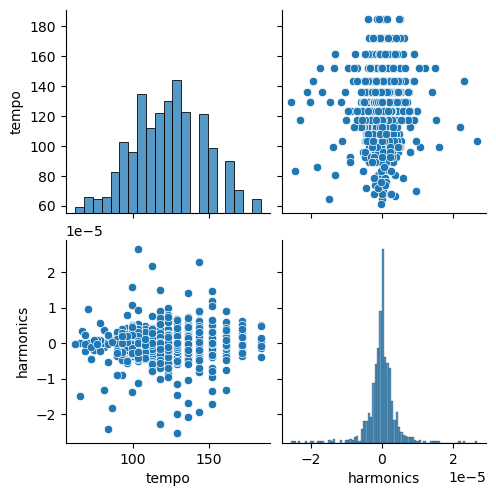

In [33]:
sns.pairplot(df)

In [34]:
df.count()

filename              845
tempo                 845
rms                   845
chromagram            845
mel_spectrogram       845
spectral_centroid     845
spectral_contrast     845
spectral_rolloff      845
zero_crossing_rate    845
harmonics             845
mfccs                 845
label                 845
dtype: int64

In [18]:
# Separate features and labels
X = df.drop(['filename', 'label'], axis=1)
y = df['label']

In [10]:
def string_to_array(s):
    try:
        # Remove any newline characters and extra spaces
        s = s.replace('\n', '')
        # Use regex to find all numbers (including scientific notation)
        numbers = re.findall(r'-?\d+\.?\d*e?[-+]?\d*', s)
        # Convert strings to float
        return np.array([float(num) for num in numbers])
    except Exception as e:
        # import ipdb;ipdb.set_trace()
        # If conversion fails, return an empty array
        print(e)
        return np.array([])

# Convert string representations of arrays to numpy arrays
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].apply(string_to_array)

In [522]:
X.head()

,tempo,rms,chromagram,mel_spectrogram,spectral_centroid,spectral_contrast,spectral_rolloff,zero_crossing_rate,harmonics,mfccs
0,112.347147,[0.08079721],"[0.08687853, 0.25835642, 0.4652982, 0.25377092...","[0.0501504913, 7.75547075, 33.8848686, 19.6195...",[363.48891187],"[23.55722326, 20.74661523, 26.51991602, 24.411...",[487.88038319],[0.025213],-4.177003e-07,"[-405.69916, 193.02412, 84.447678, 26.464853, ..."
1,123.046875,[0.05213124],"[0.28849363, 0.15575016, 0.39545178, 0.2276538...","[0.010934351, 0.0446163379, 0.918037713, 5.687...",[482.82052828],"[21.68828134, 18.84483521, 24.1717021, 25.6020...",[675.59591476],[0.03397221],-1.359662e-06,"[-399.71973, 205.4619, 52.24636, 6.5154686, 5...."
2,112.347147,[0.14452474],"[0.3175642, 0.19989942, 0.23470972, 0.16926217...","[0.265237451, 4.947258, 104.373283, 98.6313934...",[619.76959533],"[21.37286604, 18.75856033, 21.07873338, 22.466...",[1114.55992708],[0.03432103],2.189410e-05,"[-229.66428, 234.6903, -20.28688, 7.8317485, 1..."
3,107.666016,[0.05367835],"[0.3245049, 0.17989053, 0.4453289, 0.26823267,...","[0.00145741564, 0.0165022984, 0.0670844093, 0....",[849.7258218],"[21.62960462, 21.15926805, 24.56930468, 25.302...",[1327.60799447],[0.06712735],2.770955e-06,"[-342.2302, 189.39717, -15.954137, -2.056075, ..."
4,99.384014,[0.068928],"[0.25432637, 0.14552417, 0.20526256, 0.1740695...","[0.0038874438, 0.0218777619, 0.3752864, 1.3843...",[405.64366149],"[24.37217672, 19.35227646, 24.65155891, 24.969...",[490.35017076],[0.02930196],-1.153086e-06,"[-412.57288, 172.09929, 83.63398, 26.42955, 9...."


In [448]:
def parse_array(array_str):
    num = re.findall(r"[-+]?\d*\.\d+|\d+", array_str)
    return np.array(num, dtype=float)

df['rms'] = df['rms'].apply(parse_array)
df['chromagram'] = df['chromagram'].apply(parse_array)
df['mel_spectrogram'] = df['mel_spectrogram'].apply(parse_array)
df['spectral_centroid'] = df['spectral_centroid'].apply(parse_array)
df['spectral_contrast'] = df['spectral_contrast'].apply(parse_array)
df['spectral_rolloff'] = df['spectral_rolloff'].apply(parse_array)
df['zero_crossing_rate'] = df['zero_crossing_rate'].apply(parse_array)
df['mfccs'] = df['mfccs'].apply(parse_array)

In [348]:
# Extract features and labels
X = df.drop(columns=['filename', 'label'], axis=1)
y = df['label']

In [350]:
X.head()

,tempo,rms,chromagram,mel_spectrogram,spectral_centroid,spectral_contrast,spectral_rolloff,zero_crossing_rate,harmonics,mfccs
0,112.347147,[0.08079721],"[0.08687853, 0.25835642, 0.4652982, 0.25377092...","[5.01504913, 2.0, 7.75547075, 0.0, 3.38848686,...",[363.48891187],"[23.55722326, 20.74661523, 26.51991602, 24.411...",[487.88038319],[0.025213],-4.177003e-07,"[-4.0569916, 2.0, 1.9302412, 2.0, 8.4447678, 1..."
1,123.046875,[0.05213124],"[0.28849363, 0.15575016, 0.39545178, 0.2276538...","[1.0934351, 2.0, 4.46163379, 2.0, 9.18037713, ...",[482.82052828],"[21.68828134, 18.84483521, 24.1717021, 25.6020...",[675.59591476],[0.03397221],-1.359662e-06,"[-399.71973, 205.4619, 52.24636, 6.5154686, 5...."
2,112.347147,[0.14452474],"[0.3175642, 0.19989942, 0.23470972, 0.16926217...","[2.65237451, 1.0, 4.947258, 0.0, 1.04373283, 2...",[619.76959533],"[21.37286604, 18.75856033, 21.07873338, 22.466...",[1114.55992708],[0.03432103],2.189410e-05,"[-229.66428, 234.6903, -20.28688, 7.8317485, 1..."
3,107.666016,[0.05367835],"[0.3245049, 0.17989053, 0.4453289, 0.26823267,...","[1.45741564, 3.0, 1.65022984, 2.0, 6.70844093,...",[849.7258218],"[21.62960462, 21.15926805, 24.56930468, 25.302...",[1327.60799447],[0.06712735],2.770955e-06,"[-342.2302, 189.39717, -15.954137, -2.056075, ..."
4,99.384014,[0.068928],"[0.25432637, 0.14552417, 0.20526256, 0.1740695...","[3.8874438, 3.0, 2.18777619, 2.0, 3.752864, 1....",[405.64366149],"[24.37217672, 19.35227646, 24.65155891, 24.969...",[490.35017076],[0.02930196],-1.153086e-06,"[-412.57288, 172.09929, 83.63398, 26.42955, 9...."


In [12]:
# Normalize features using MinMaxScaler
scaler = MinMaxScaler()

def scale_column(col):
    if isinstance(col.iloc[0], np.ndarray):
        # If the column contains numpy arrays, we need to scale each array individually
        return col.apply(lambda x: scaler.fit_transform(x.reshape(-1, 1)).flatten())
    else:
        # Otherwise, we just scale the column
        return scaler.fit_transform(col.values.reshape(-1, 1)).flatten()

# Apply the scaler to each column
for column in X.columns:
    X[column] = scale_column(X[column])

In [13]:
X

,tempo,rms,chromagram,mel_spectrogram,spectral_centroid,spectral_contrast,spectral_rolloff,zero_crossing_rate,harmonics,mfccs
0,0.413043,[0.0],"[0.0, 0.4531421160004711, 1.0, 0.4410246169286...","[0.0014800258401495663, 0.22887710835440117, 1...",[0.0],"[0.3165339733657263, 0.2124646807377205, 0.426...",[0.0],[0.0],0.481378,"[0.0, 1.0, 0.8186533819095859, 0.7218092688829..."
1,0.500000,[0.0],"[0.5289007551414131, 0.06957896199240932, 0.89...","[0.0011076855455306313, 0.004519781073114422, ...",[0.0],"[0.1490250585666676, 0.02754964252713432, 0.25...",[0.0],[0.0],0.463258,"[0.0, 1.0, 0.7468271798005501, 0.6712616154591..."
2,0.413043,[0.0],"[0.3363480257650402, 0.06948508090125255, 0.14...","[0.002541238441015823, 0.047399658304456554, 0...",[0.0],"[0.11438529154588106, 0.0, 0.10151592820456556...",[0.0],[0.0],0.910571,"[0.0, 1.0, 0.45089982745513135, 0.511454045527..."
3,0.375000,[0.0],"[0.6560840047210742, 0.2444505958769304, 1.0, ...","[0.0001273611904489172, 0.0014421424795868938,...",[0.0],"[0.0202005678301026, 0.0, 0.14645826125629546,...",[0.0],[0.0],0.542715,"[0.0, 1.0, 0.6137307471584843, 0.6398732348938..."
4,0.307692,[0.0],"[0.2895894770582113, 0.05668994030914137, 0.18...","[0.00010826922506175346, 0.0006093177333871451...",[0.0],"[0.3291906523691138, 0.14277462268196583, 0.33...",[0.0],[0.0],0.467232,"[0.0, 0.9999999999999999, 0.8486924561502558, ..."
...,...,...,...,...,...,...,...,...,...,...
840,0.500000,[0.0],"[0.49162570572179154, 0.12773657668647714, 0.0...","[0.0012420301113359796, 0.01832063657257946, 0...",[0.0],"[0.06206178127127271, 0.0, 0.15049106396444223...",[0.0],[0.0],0.470079,"[0.0, 1.0, 0.4995878285391142, 0.6275617074116..."
841,0.250000,[0.0],"[0.6001897436596604, 0.13419175634417413, 0.24...","[0.0006025082673885371, 0.008967350954261835, ...",[0.0],"[0.260891288042851, 0.0, 0.2893921713210531, 0...",[0.0],[0.0],0.530819,"[0.0, 1.0, 0.506131530214017, 0.58889005057857..."
842,0.666667,[0.0],"[0.5313320662510506, 0.22048749116889663, 0.17...","[0.0027639379498076103, 0.012658832968188849, ...",[0.0],"[0.00994407929558494, 0.0, 0.16946527147516677...",[0.0],[0.0],0.551986,"[0.0, 1.0, 0.5548006816625591, 0.5745068869181..."
843,0.605263,[0.0],"[0.22481653623228398, 1.0000000000000002, 0.13...","[0.0001661404217026749, 0.0015726934377951868,...",[0.0],"[0.1482318751803383, 0.0, 0.20356991399538293,...",[0.0],[0.0],0.451481,"[0.0, 1.0, 0.4856136989830992, 0.6345464920055..."


In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [341]:
y

0      Q4
1      Q4
2      Q2
3      Q4
4      Q4
       ..
840    Q1
841    Q1
842    Q1
843    Q1
844    Q3
Name: label, Length: 845, dtype: object

In [343]:
# X.values

In [328]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical



# Combine all features into a single numpy array
X = X.values

# Reshape X to be 3D: (samples, timesteps, features)
# Assuming each feature is a 1D array, if not, this step might need adjustment
X = X.reshape(-1, 1, 64)

# Prepare the labels
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(1, 64), padding='same'),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

ValueError: cannot reshape array of size 8450 into shape (1,64)

In [330]:
X.shape

(845, 10)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, GlobalAveragePooling1D
from tensorflow.keras.utils import to_categorical

# Load the data
data = pd.read_csv('audio_features_head.csv')

# Prepare the features
features = ['tempo', 'rms', 'chromagram', 'mel_spectrogram', 'spectral_centroid', 
            'spectral_contrast', 'spectral_rolloff', 'zero_crossing_rate', 
            'harmonics', 'mfccs']

# Combine all features into a single numpy array
X = data[features].values

# Reshape X to be 3D: (samples, timesteps, features)
# Based on the error message, it seems X shape is (samples, 1, 64)
# If this is not correct, please adjust this reshaping
X = X.reshape(-1, 1, 64)

# Prepare the labels
le = LabelEncoder()
y = le.fit_transform(data['label'])
y = to_categorical(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(1, 64), padding='same'),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')